<center>

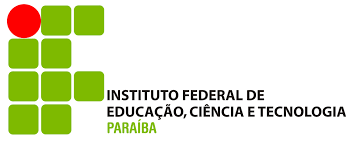

<center>

INSTITUTO FEDERAL DE CIÊNCIA E TECNOLOGIA DA PARAÍBA

CAMPUS CAMPINA GRANDE

BACHARELADO EM ENGENHARIA DA COMPUTAÇÃO

DISCIPLINA: CONTROLE E AUTOMAÇÃO

PROFESSOR: MOACY PEREIRA DA SILVA

<center>

<br>
<br>
<br>

**ESTUDO DIRIGIDO DA DISCIPLINA: CONTROLE E AUTOMAÇÃO**

<br>

**Entrega 01**

<br>
<br>

Daniel Barbosa Vasconcelos

<center>

<br>
<br>
<br>

30 de outubro de 2025 <br>
Campina Grande, PB

In [2]:
!pip install control
!pip install tclab
from control import *
from control.matlab import *
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import signal
import control as ctrl
import control as ctl
from scipy.signal import TransferFunction, impulse


# **Capítulo 5: O Desempenho de Sistemas de Controle com Retroação**

## 5.1 Introdução e Sinais de Entrada para Teste

O desempenho de um sistema de controle é avaliado em dois regimes: **Resposta Transitória** (comportamento inicial que desaparece com o tempo) e **Regime Estacionário** (resposta obtida após a estabilização). A retroação é essencial para ajustar o desempenho em ambos os regimes.

Para testar o projeto e garantir que o sistema atenda às especificações, são utilizados sinais de entrada padronizados.

#### **Sinais de Teste Padronizados**

Os sinais de teste são da forma geral $r(t)=t^n$.

* **Transformada de Laplace:**
    $$
    R(s) = \frac{n!}{s^{n+1}}\text{.}
    $$

* **Aplicações em Indústria 4.0:** Estes sinais simulam comandos operacionais. Por exemplo, a **Entrada em Degrau ($n=0$)** simula o acionamento de um robô para uma nova posição (aplicação *pick-and-place*), e a **Entrada em Rampa ($n=1$)** simula o rastreamento contínuo de um veículo autônomo (AGV) que segue uma trajetória de velocidade constante.


## 5.2 Desempenho de um Sistema de Segunda Ordem

O desempenho de sistemas em malha fechada (especialmente aqueles dominados por um par de polos complexos) é frequentemente caracterizado pelo modelo de **Segunda Ordem**.

#### **Função de Transferência Canônica (Entrada em Degrau)**

A saída $Y(s)$ para uma entrada em degrau unitário é dada por:
$$
Y(s) = \frac{\omega_n^2}{s(s^2 + 2 \zeta\omega_ns + \omega_n^2}\text{.}
$$
Onde $\zeta$ é o **Fator de Amortecimento** (determina a forma da resposta) e $\omega_n$ é a **Frequência Natural Não Amortecida** (determina a velocidade da resposta).

#### **Métricas de Desempenho na Resposta Transitória**

O desempenho é medido pelas seguintes especificações de tempo:

* **Tempo de Pico ($T_p$)**: Tempo para o sistema atingir o primeiro pico de ultrapassagem.
* **Tempo de Assentamento ($T_s$)**: Tempo necessário para a resposta do sistema permanecer dentro de uma banda percentual ($\delta$, geralmente 2% ou 5%) do valor final.
    $$
    T_s \approx \frac{4}{\zeta\omega_n} \quad (\text{para critério de } 2\%)
    $$
* **Ultrapassagem Percentual (U.P.)**: Mede o quanto a resposta excede o valor de regime permanente.
    $$
    \mbox{U.P.} = \frac{M_{p_t} - fv}{fv} \times 100\%
    $$
    Onde $M_{p_t}$ é o valor de pico da resposta temporal e $fv$ é o valor final da resposta.

* **Aplicações em Indústria 4.0:** Essas métricas são diretamente ligadas à eficiência e à segurança. Na **Manufatura Avançada**, um $T_s$ baixo (rápido) maximiza a taxa de produção (throughput), e uma U.P. controlada (baixa) é vital para evitar danos em materiais sensíveis ou garantir a precisão de **Robôs Colaborativos (Cobots)** durante o posicionamento.

#### **Métricas de Desempenho**
Vamos calcular e plotar as principais métricas de desempenho:

* **Ultrapassagem Percentual (U.P.)**: O pico máximo da resposta.
    $$
    \mbox{U.P.} = 100 \times e^{\left(\frac{-\zeta\pi}{\sqrt{1-\zeta^2}}\right)}
    $$
* **Tempo de Pico ($T_p$)**: O tempo para atingir o pico da U.P.
    $$
    T_p = \frac{\pi}{\omega_n\sqrt{1 - \zeta^2}}
    $$
* **Tempo de Assentamento ($T_s$)**: O tempo para a resposta se estabilizar (critério de 2%).
    $$
    T_s \approx \frac{4}{\zeta\omega_n}
    $$

Sistema de 2ª Ordem com zeta=0.5 e wn=2.0
<TransferFunction>: sys[4]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

        4
  -------------
  s^2 + 2 s + 4

--- Métricas Teóricas ---
Ultrapassagem (UP): 16.30 % (Valor de Pico: 1.163)
Tempo de Pico (Tp): 1.814 s
Tempo de Assentamento (Ts 2%): 4.000 s


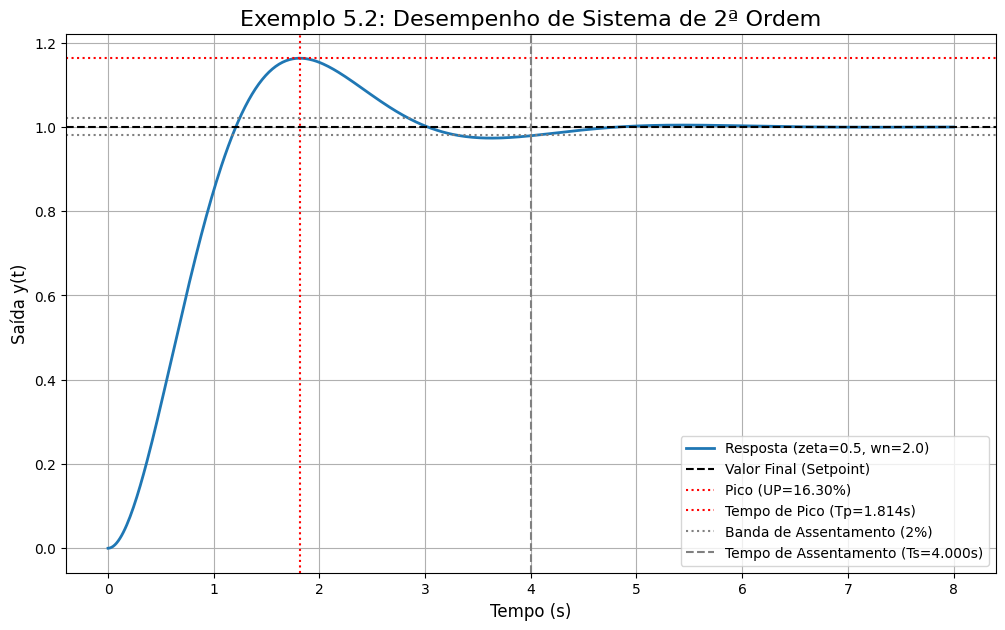

In [5]:
# Instale a biblioteca python-control se necessário
# !pip install python-control

import control as ct
import matplotlib.pyplot as plt
import numpy as np

# --- 1. Definição dos Parâmetros do Sistema ---
zeta = 0.5  # Fator de Amortecimento (Subamortecido)
wn = 2.0    # Frequência Natural (rad/s)

# --- 2. Criação da Função de Transferência ---
# T(s) = wn^2 / (s^2 + 2*zeta*wn*s + wn^2)
num = [wn**2]
den = [1, 2*zeta*wn, wn**2]
sistema_2ordem = ct.tf(num, den)

print(f"Sistema de 2ª Ordem com zeta={zeta} e wn={wn}")
print(sistema_2ordem)

# --- 3. Cálculo Teórico das Métricas ---
# Frequência Amortecida
wd = wn * np.sqrt(1 - zeta**2)

# Tempo de Pico (Tp)
Tp = np.pi / wd
# Ultrapassagem Percentual (UP)
UP_percent = 100 * np.exp((-zeta * np.pi) / np.sqrt(1 - zeta**2))
# Valor de Pico (Valor final é 1.0)
Valor_Pico = 1 + (UP_percent / 100)
# Tempo de Assentamento (Ts) - Critério de 2%
Ts = 4 / (zeta * wn)

print(f"\n--- Métricas Teóricas ---")
print(f"Ultrapassagem (UP): {UP_percent:.2f} % (Valor de Pico: {Valor_Pico:.3f})")
print(f"Tempo de Pico (Tp): {Tp:.3f} s")
print(f"Tempo de Assentamento (Ts 2%): {Ts:.3f} s")

# --- 4. Simulação da Resposta ao Degrau ---
t = np.linspace(0, 8, 500)
t, y = ct.step_response(sistema_2ordem, T=t)

# --- 5. Plotagem com Anotações ---
plt.figure(figsize=(12, 7))
plt.plot(t, y, label=f'Resposta (zeta={zeta}, wn={wn})', linewidth=2)

# Linhas de referência
plt.axhline(1.0, color='black', linestyle='--', label='Valor Final (Setpoint)')
plt.axhline(Valor_Pico, color='red', linestyle=':', label=f'Pico (UP={UP_percent:.2f}%)')
plt.axvline(Tp, color='red', linestyle=':', label=f'Tempo de Pico (Tp={Tp:.3f}s)')
plt.axhline(1.02, color='gray', linestyle=':', label='Banda de Assentamento (2%)')
plt.axhline(0.98, color='gray', linestyle=':')
plt.axvline(Ts, color='gray', linestyle='--', label=f'Tempo de Assentamento (Ts={Ts:.3f}s)')

plt.title('Exemplo 5.2: Desempenho de Sistema de 2ª Ordem', fontsize=16)
plt.xlabel('Tempo (s)', fontsize=12)
plt.ylabel('Saída y(t)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

## 5.3 Erro de Estado Estacionário (Regime Permanente)

O **Erro de Estado Estacionário** ($e_{ss}$) é o erro residual observado na saída do sistema após o término da resposta transitória e a estabilização.

* **Sistema Tipo 0** (sem integrador): Possui $e_{ss}$ finito para entrada em Degrau.
* **Sistema Tipo 1** (com 1 integrador): Possui $e_{ss}$ nulo para entrada em Degrau, mas $e_{ss}$ finito para Rampa.

### Fórmula Geral do Erro (Teorema do Valor Final)

O erro em regime permanente é calculado no domínio de Laplace:
$$
e_{ss} = \lim_{t\rightarrow\infty}e(t) = \lim_{s\rightarrow0}sE(s)
$$
Onde a função de erro $E(s)$ para um sistema de realimentação unitária ($H(s)=1$) é:
$$
E(s) = \frac{R(s)}{1 + G(s)}
$$

### Análise para Entradas Padrão

O erro em regime permanente depende do **Tipo do Sistema** (o número de integradores puros no caminho de avanço $G(s)$).




**Entrada em Degrau** ($R(s) = A/s$):

$$
e_{ss} = \lim_{s\rightarrow0} \frac{s(A/s)}{1+G(s)}=\frac{A}{1+G(0)}\text{.}
$$


**Entrada em Rampa** ($R(s) = A/s^2$):

$$
e_{ss} = \lim_{s\rightarrow0} \frac{s(A/s^2)}{1+G(s)}=\lim_{s\rightarrow0} \frac{A}{s+sG(s)}= \lim_{s\rightarrow0} \frac{A}{sG(s)}\text{.}
$$


* **Aplicações em Indústria 4.0:** A exigência de $e_{ss}=0$ é crucial para o controle de **Máquinas CNC** e sistemas de leitura de precisão (como **Acionadores de Disco**), garantindo que o valor final seja exatamente o comando. Controladores PI (Proporcional-Integral) são comumente usados para introduzir um integrador e garantir $e_{ss}$ nulo para entradas em degrau.

Este exemplo simula um sistema **Tipo 0** e um **Tipo 1** para demonstrar o impacto da Ação Integral (o integrador $1/s$) no erro.

Sistema Malha Fechada (Tipo 0):
<TransferFunction>: sys[19]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

    5
  -----
  s + 7

Sistema Malha Fechada (Tipo 1):
<TransferFunction>: sys[21]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

        5
  -------------
  s^2 + 2 s + 5


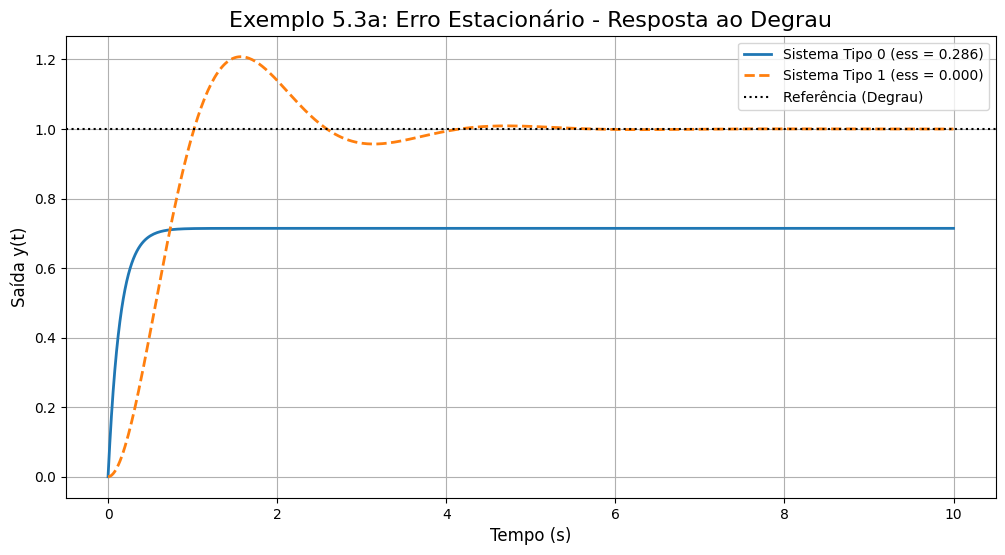


Análise (Degrau): O Sistema Tipo 0 estabiliza em 0.714 (com erro). O Tipo 1 estabiliza em 1.000 (sem erro).


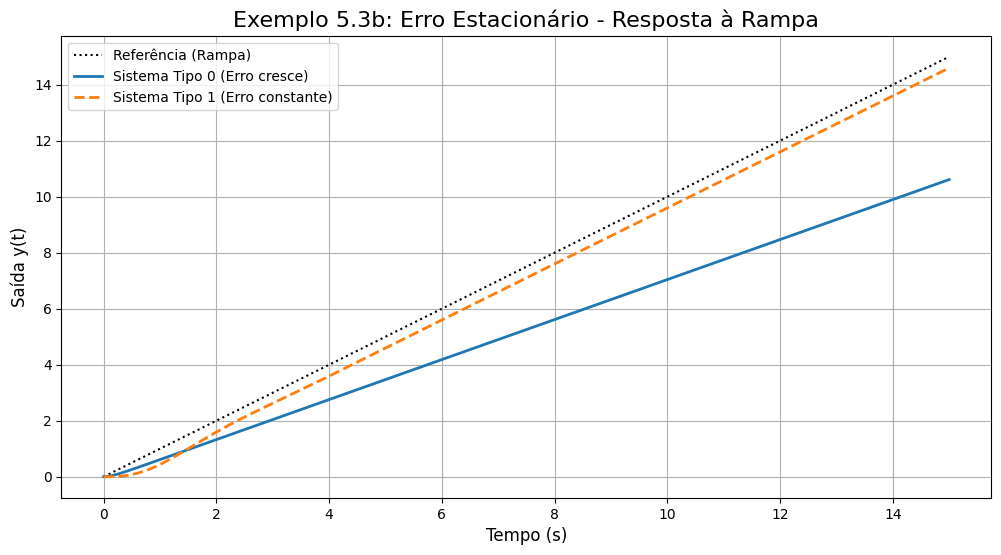


Análise (Rampa): O erro do Tipo 0 cresce (erro=4.388 em t=15s). O Tipo 1 segue a rampa com erro constante (erro=0.400 em t=15s).


In [7]:
# Instale a biblioteca python-control se necessário
# !pip install python-control

import control as ct
import matplotlib.pyplot as plt
import numpy as np

# --- 1. Definição dos Sistemas (Malha Aberta) ---

# Sistema TIPO 0: G(s) = K / (s+a)
# Kp = 5/2 = 2.5 -> ess_degrau = 1 / (1 + 2.5) = 0.285
G_tipo0 = ct.tf([5], [1, 2])

# Sistema TIPO 1: G(s) = K / (s(s+a))
# Kp = infinito -> ess_degrau = 0
# Kv = 5/2 = 2.5 -> ess_rampa = 1 / 2.5 = 0.4
G_tipo1 = ct.tf([5], [1, 2, 0]) # o '0' no final indica o polo em s=0

# --- 2. Fechamento da Malha (Realimentação Unitária) ---
T_tipo0_mf = ct.feedback(G_tipo0, 1)
T_tipo1_mf = ct.feedback(G_tipo1, 1)

print("Sistema Malha Fechada (Tipo 0):")
print(T_tipo0_mf)
print("\nSistema Malha Fechada (Tipo 1):")
print(T_tipo1_mf)

# --- 3. Simulação da Resposta ao DEGRAU ---
t_step = np.linspace(0, 10, 500)
t_step_resp0, y_step0 = ct.step_response(T_tipo0_mf, T=t_step)
t_step_resp1, y_step1 = ct.step_response(T_tipo1_mf, T=t_step)

# --- 4. Plotagem da Resposta ao DEGRAU ---
plt.figure(figsize=(12, 6))
plt.plot(t_step_resp0, y_step0, label=f'Sistema Tipo 0 (ess = {1-y_step0[-1]:.3f})', linewidth=2)
plt.plot(t_step_resp1, y_step1, label=f'Sistema Tipo 1 (ess = {1-y_step1[-1]:.3f})', linewidth=2, linestyle='--')
plt.axhline(1.0, color='black', linestyle=':', label='Referência (Degrau)')
plt.title('Exemplo 5.3a: Erro Estacionário - Resposta ao Degrau', fontsize=16)
plt.xlabel('Tempo (s)', fontsize=12)
plt.ylabel('Saída y(t)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

print(f"\nAnálise (Degrau): O Sistema Tipo 0 estabiliza em {y_step0[-1]:.3f} (com erro). O Tipo 1 estabiliza em {y_step1[-1]:.3f} (sem erro).")

# --- 5. Simulação da Resposta à RAMPA ---
t_ramp = np.linspace(0, 15, 500)
u_ramp = t_ramp # Entrada Rampa r(t) = t

# Resposta forçada à rampa
t_ramp_resp0, y_ramp0 = ct.forced_response(T_tipo0_mf, T=t_ramp, U=u_ramp)
t_ramp_resp1, y_ramp1 = ct.forced_response(T_tipo1_mf, T=t_ramp, U=u_ramp)

# --- 6. Plotagem da Resposta à RAMPA ---
plt.figure(figsize=(12, 6))
plt.plot(t_ramp, u_ramp, color='black', linestyle=':', label='Referência (Rampa)')
plt.plot(t_ramp_resp0, y_ramp0, label='Sistema Tipo 0 (Erro cresce)', linewidth=2)
plt.plot(t_ramp_resp1, y_ramp1, label='Sistema Tipo 1 (Erro constante)', linewidth=2, linestyle='--')

# Cálculo do erro em t=15s
ess_rampa0 = u_ramp[-1] - y_ramp0[-1]
ess_rampa1 = u_ramp[-1] - y_ramp1[-1]

plt.title('Exemplo 5.3b: Erro Estacionário - Resposta à Rampa', fontsize=16)
plt.xlabel('Tempo (s)', fontsize=12)
plt.ylabel('Saída y(t)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

print(f"\nAnálise (Rampa): O erro do Tipo 0 cresce (erro={ess_rampa0:.3f} em t=15s). O Tipo 1 segue a rampa com erro constante (erro={ess_rampa1:.3f} em t=15s).")

## 5.4 Efeitos de Polos e Zeros Dominantes e Simplificação

Em sistemas de ordem superior, a **Resposta Transitória** é dominada pelos polos mais próximos do eixo imaginário (os **Polos Dominantes**).

* **Critério de Aproximação:** A resposta de um sistema de terceira ordem pode ser aproximada pelas raízes dominantes de segunda ordem se a parte real das raízes dominantes for inferior a $1/10$ da parte real do terceiro polo.
* **Aplicações em Indústria 4.0:** Em **Sistemas de Controle Hierárquico** ou com múltiplos sensores IoT (Internet das Coisas), a simplificação de modelos complexos por polos dominantes permite que o controlador de nível superior (ou o *Edge Computing*) tome decisões de controle mais rapidamente, com menos recursos computacionais, mantendo a precisão do desempenho transitório.

Este exemplo simula um sistema de 2ª ordem base e compara sua resposta com a adição de um polo "distante", um polo "próximo" e um "zero".

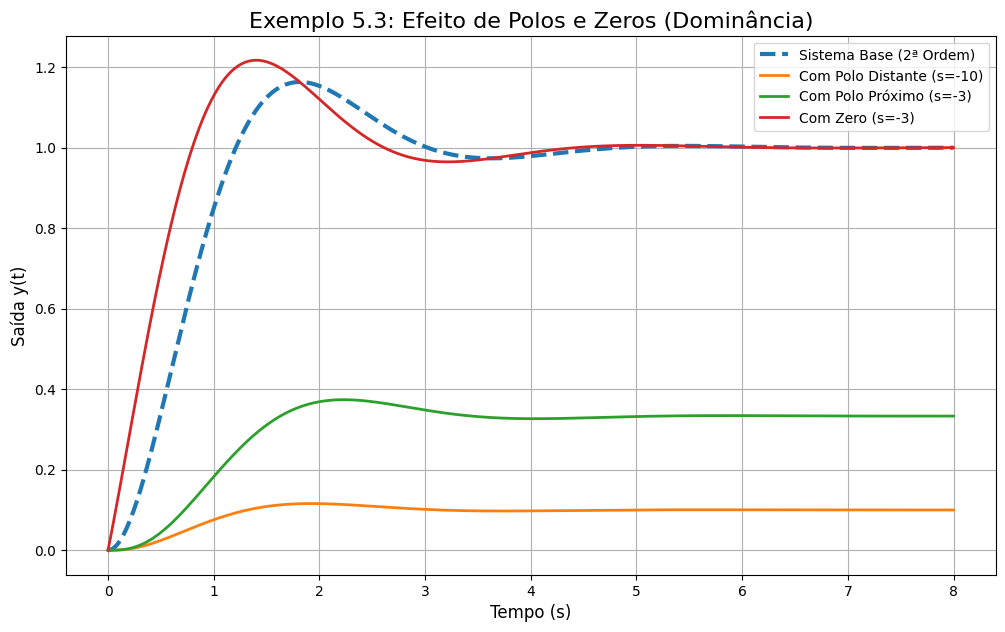


Análise do Gráfico (Polos Dominantes):
1. A curva com 'Polo Distante' (s=-10) é quase idêntica à 'Base'. A aproximação por polos dominantes é VÁLIDA.
2. A curva com 'Polo Próximo' (s=-3) torna a resposta mais LENTA e menos oscilatória.
3. A curva com 'Zero' (s=-3) torna a resposta mais RÁPIDA e aumenta a Ultrapassagem (UP).


In [8]:
# Instale a biblioteca python-control se necessário
# !pip install python-control

import control as ct
import matplotlib.pyplot as plt
import numpy as np

# --- 1. Definição do Sistema Base (2ª Ordem) ---
# Usamos o sistema do Exemplo 5.2: zeta=0.5, wn=2
# Polos dominantes em: -zeta*wn +/- j*wd = -1 +/- j*1.732
zeta = 0.5
wn = 2.0
num_base = [wn**2]
den_base = [1, 2*zeta*wn, wn**2]
T_base = ct.tf(num_base, den_base)

# --- 2. Adição de um Polo "Distante" ---
# Polo dominante tem parte real -1.
# Polo distante: p_dist = -10 (10x mais longe)
p_dist = 10.0
# T(s) = T_base * (10 / (s+10)) -> Mantém ganho DC=1
num_polo_dist = np.convolve(num_base, [p_dist])
den_polo_dist = np.convolve(den_base, [1, p_dist])
T_polo_dist = ct.tf(num_polo_dist, den_polo_dist) / p_dist # Normaliza ganho DC

# --- 3. Adição de um Polo "Próximo" ---
# Polo próximo: p_prox = -3 (Apenas 3x mais longe)
p_prox = 3.0
num_polo_prox = np.convolve(num_base, [p_prox])
den_polo_prox = np.convolve(den_base, [1, p_prox])
T_polo_prox = ct.tf(num_polo_prox, den_polo_prox) / p_prox # Normaliza ganho DC

# --- 4. Adição de um "Zero" ---
# Zero em z = -3
z_zero = 3.0
# T(s) = T_base * ((s+3)/3) -> Mantém ganho DC=1
num_zero = np.convolve(num_base, [1, z_zero])
den_zero = den_base
T_zero = ct.tf(num_zero, den_zero) / z_zero # Normaliza ganho DC

# --- 5. Simulação de todos os sistemas ---
t = np.linspace(0, 8, 500)
t_base, y_base = ct.step_response(T_base, T=t)
t_polo_dist, y_polo_dist = ct.step_response(T_polo_dist, T=t)
t_polo_prox, y_polo_prox = ct.step_response(T_polo_prox, T=t)
t_zero, y_zero = ct.step_response(T_zero, T=t)

# --- 6. Plotagem Comparativa ---
plt.figure(figsize=(12, 7))
plt.plot(t_base, y_base, label='Sistema Base (2ª Ordem)', linewidth=3, linestyle='--')
plt.plot(t_polo_dist, y_polo_dist, label='Com Polo Distante (s=-10)', linewidth=2)
plt.plot(t_polo_prox, y_polo_prox, label='Com Polo Próximo (s=-3)', linewidth=2)
plt.plot(t_zero, y_zero, label='Com Zero (s=-3)', linewidth=2)
plt.title('Exemplo 5.4: Efeito de Polos e Zeros (Dominância)', fontsize=16)
plt.xlabel('Tempo (s)', fontsize=12)
plt.ylabel('Saída y(t)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

print("\nAnálise do Gráfico (Polos Dominantes):")
print(f"1. A curva com 'Polo Distante' (s=-10) é quase idêntica à 'Base'. A aproximação por polos dominantes é VÁLIDA.")
print(f"2. A curva com 'Polo Próximo' (s=-3) torna a resposta mais LENTA e menos oscilatória.")
print(f"3. A curva com 'Zero' (s=-3) torna a resposta mais RÁPIDA e aumenta a Ultrapassagem (UP).")



## 5.5 Índices de Desempenho (Otimização)

O **Sistema de Controle Ótimo** é aquele que minimiza um índice de desempenho quantitativo.

#### **Fórmulas de Índices Baseados na Integral do Erro**

Estes índices penalizam o erro ao longo do tempo:

* **Integral do Quadrado do Erro (ISE):** Penaliza grandes erros.
    $$
    \mbox{ISE} = \int_0^T{e^2(t)dt}
    $$
* **Integral do Tempo Multiplicado pelo Valor Absoluto (ITAE):** Penaliza erros de longa duração (o termo $t$ na integral dá mais peso aos erros tardios).
    $$
    \mbox{ITAE} = \int_0^T t|e(t)|dt
    $$

* **Aplicações em Indústria 4.0:** Em sistemas de **Inteligência Artificial (IA) para Controle** e **Aprendizado por Reforço (Reinforcement Learning)**, os índices (especialmente o ITAE) são usados como parte da função de custo ou recompensa para treinar o algoritmo a sintonizar os ganhos do controlador, buscando a otimização do desempenho sem oscilações prolongadas.


## 5.6 Exemplo de Projeto: Ajuste de Desempenho de um Motor

O objetivo é projetar um controlador $G_c(s)$ para um motor com $G(s) = \frac{10}{s(s+1)}$ para que a resposta ao degrau seja rápida e suave.

**Especificações de Projeto:** Fator de Amortecimento $\zeta=0.707$ e Frequência Natural $\omega_n=5 \text{ rad/s}$.

### **Código de Simulação: Resposta Transitória Otimizada**

O código a seguir projeta um controlador para um sistema de segunda ordem com as especificações desejadas.

```python
import control as ctl
import matplotlib.pyplot as plt
import numpy as np

# --- Exemplo 5.4: Ajuste de Desempenho de um Motor ---
print("--- SIMULAÇÃO DE DESEMPENHO (Ajuste de Motor) ---")

# 1. Definição das Especificações Desejadas
zeta_desejado = 0.707
wn_desejada = 5.0 # rad/s

# 2. Cálculo do Polinômio Característico Desejado
# Denominador: s^2 + 2*zeta*wn*s + wn^2
den_desejado = [1, 2 * zeta_desejado * wn_desejada, wn_desejada**2]

# 3. FT do Sistema Desejado (para Realimentação Unitária)
T_desejado = ctl.TransferFunction([wn_desejada**2], den_desejado)

# 4. Resposta ao Degrau
t_s = np.linspace(0, 3, 500)
t, y = ctl.step_response(T_desejado, t_s)

# 5. Cálculo das Métricas (aproximadas)
Ts = 4 / (zeta_desejado * wn_desejada)
UP = np.exp((-zeta_desejado * np.pi) / np.sqrt(1 - zeta_desejado**2)) * 100

# 6. Plotagem da Resposta Otimizada
plt.figure(figsize=(10, 5))
plt.plot(t, y, label=f'Resposta Desejada (zeta={zeta_desejado}, wn={wn_desejada:.1f})')
plt.axhline(1.0, color='red', linestyle=':', label='Valor Final')
plt.axvline(Ts, color='gray', linestyle='--', label=f'Ts (2%): {Ts:.2f} s')
plt.title(f'Resposta Transitória Otimizada (UP: {UP:.1f}%)')
plt.xlabel('Tempo (s)')
plt.ylabel('Saída y(t)')
plt.legend()
plt.grid(True)
plt.show()

--- SIMULAÇÃO DE DESEMPENHO (Ajuste de Motor) ---


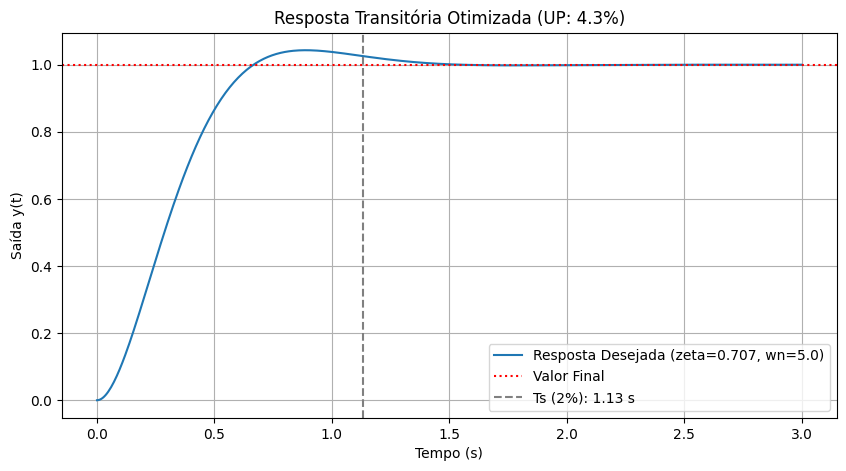

In [3]:
import control as ctl
import matplotlib.pyplot as plt
import numpy as np

# --- Exemplo 5.4: Ajuste de Desempenho de um Motor ---
print("--- SIMULAÇÃO DE DESEMPENHO (Ajuste de Motor) ---")

# 1. Definição das Especificações Desejadas
zeta_desejado = 0.707
wn_desejada = 5.0 # rad/s

# 2. Cálculo do Polinômio Característico Desejado
# Denominador: s^2 + 2*zeta*wn*s + wn^2
den_desejado = [1, 2 * zeta_desejado * wn_desejada, wn_desejada**2]

# 3. FT do Sistema Desejado (para Realimentação Unitária)
T_desejado = ctl.TransferFunction([wn_desejada**2], den_desejado)

# 4. Resposta ao Degrau
t_s = np.linspace(0, 3, 500)
t, y = ctl.step_response(T_desejado, t_s)

# 5. Cálculo das Métricas (aproximadas)
Ts = 4 / (zeta_desejado * wn_desejada)
UP = np.exp((-zeta_desejado * np.pi) / np.sqrt(1 - zeta_desejado**2)) * 100

# 6. Plotagem da Resposta Otimizada
plt.figure(figsize=(10, 5))
plt.plot(t, y, label=f'Resposta Desejada (zeta={zeta_desejado}, wn={wn_desejada:.1f})')
plt.axhline(1.0, color='red', linestyle=':', label='Valor Final')
plt.axvline(Ts, color='gray', linestyle='--', label=f'Ts (2%): {Ts:.2f} s')
plt.title(f'Resposta Transitória Otimizada (UP: {UP:.1f}%)')
plt.xlabel('Tempo (s)')
plt.ylabel('Saída y(t)')
plt.legend()
plt.grid(True)
plt.show()